# Portfolio difference

In [1]:
import pandas as pd
import numpy as np

from cvx.simulator.builder import builder

pd.options.plotting.backend = "plotly"

# Get rid of findfont: Font family 'Arial' not found.
# when running a remote notebook on Jupyter Server on Ubuntu Linux server
import logging
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

In [2]:
prices=pd.read_csv("data/stock_prices.csv", header=0, index_col=0, parse_dates=True)

## Monkey portfolio

In [3]:
b = builder(prices=prices, initial_cash=1e6)

for time, state in b:
    n = len(b.assets)
    w = np.random.rand(n)
    b.set_weights(time=time[-1], weights=pd.Series(index=b.assets, data=w/np.sum(w)))
    
monkey = b.build()

## One over N portfolio

In [4]:
b = builder(prices=prices, initial_cash=1e6)

for time, state in b:
    n = len(b.assets)
    w = np.ones(n)
    b[time[-1]] = state.nav * pd.Series(index=b.assets, data=w/np.sum(w)) / state.prices
    
one_over_n = b.build()

## Difference

In [6]:
from cvx.simulator.portfolio import diff

In [7]:
d= diff(one_over_n, monkey, initial_cash=1e6)

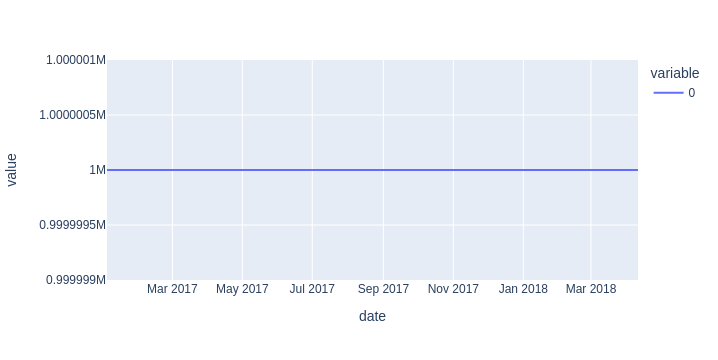

In [10]:
# cash remains close to 1m as short position is financing the long position
d.cash.round().plot()

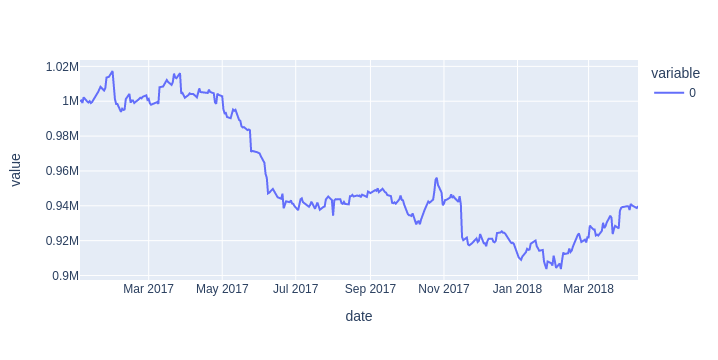

In [11]:
d.nav.plot()